In [1]:
## Importing the requried libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
import cufflinks as cf
import plotly.tools as tls
import plotly.offline as iplot
import plotly.express as px
import plotly.figure_factory as ff

## Reading the dataset

In [2]:
credit_data = pd.read_excel('default_of_credit_card_clients_0.xlsx')

In [3]:
credit_data.head().T

0       1      2      3      4
ID                              1       2      3      4      5
LIMIT_BAL                   20000  120000  90000  50000  50000
SEX                             2       2      2      2      1
EDUCATION                       2       2      2      2      2
MARRIAGE                        1       2      2      1      1
AGE                            24      26     34     37     57
PAY_0                           2       0      0      0      0
PAY_2                           2       2      0      0      0
PAY_3                           0       0      0      0      0
PAY_4                           0       0      0      0      0
PAY_5                           0       0      0      0      0
PAY_6                           0       2      0      0      0
BILL_AMT1                    3913    2682  29239  46990   8617
BILL_AMT2                    3102    1725  14027  48233   5670
BILL_AMT3                     689    2682  13559  49291  35835
BILL_AMT4                       0    3272  14331  28314  20940
BILL_AMT5                       0    3455  14948  28959  19146
BILL_AMT6                       0    3261  15549  29547  19131
PAY_AMT1                        0       0   1518   2000   2000
PAY_AMT2                      689    1000   1500   2019  36681
PAY_AMT3                        0    1000   1000   1200  10000
PAY_AMT4                        0    1000   1000   1100   9000
PAY_AMT5                        0       0   1000   1069    689
PAY_AMT6                        0    2000   5000   1000    679
default payment next month      1       1      0      0      0

## Description of the Data:
    
 This research employed a binary variable – default payment, Y (Yes = 1, No = 0), as the response variable. 

    This study used the following 23 variables as explanatory variables: 

        1) Limit_balance: Amount of the given credit (NT dollar), (includes individual consumer credit and his/her family)
        2) Sex:    1 = male
                   2 = female 
        3) Education: 1 = graduate school 
                      2 = university
                      3 = high school
                      4 = others
        4) Marital status: 1 = married
                           2 = single
                           3 = others
        5) Age (in years)

    We have tracked the past monthly payment records (from April to September, 2005) as follows


        measurement scale for the repayment status is:                0 = pay duly; 
                                                                      1 = payment delay for one month; 
                                                                      2 = payment delay for two months;....
                                                                      :
                                                                      :
                                                                      :
                                                                      8 = payment delay for eight months; 
                                                                      9 = payment delay for nine months and above. 
        6) Pay0 = the repayment status in September, 2005; 
        7) Pay2 = the repayment status in August, 2005; 
        8) Pay3 = the repayment status in July, 2005.
        9) Pay4 = the repayment status in June, 2005.
       10) Pay5 = the repayment status in May, 2005.
       11) Pay6 = the repayment status in April, 2005.


       12) BILL_AMT1 = amount of bill statement in September,2005; 
       13) BILL_AMT2 = amount of bill statement in August, 2005; 
       14) BILL_AMT3 = amount of bill statement in July, 2005;
       15) BILL_AMT4 = amount of bill statement in June, 2005;
       16) BILL_AMT5 = amount of bill statement in May, 2005;
       17) BILL_AMT6 = amount of bill statement in April, 2005.

       18) PAY_AMT1 = amount paid in September,2005; 
       19) PAY_AMT2 = amount paid in August,2005; 
       20) PAY_AMT3 = amount paid in July,2005;
       21) PAY_AMT4 = amount paid in June,2005;
       22) PAY_AMT5 = amount paid in May,2005;
       23) PAY_AMT6 = amount paid in April, 2005. 

## Exploratory Data Analysis

In [4]:
credit_data.shape  ## consit of 30k observation and 23 features

(30000, 25)

In [5]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
## Findings from above analysis

## 1)All the features are in numerical format
## 2) No null values

In [7]:
credit_data.describe().T

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0       0.356767       0.760594       0.0   
PAY_2                       30000.0       0.320033       0.801727       0.0   
PAY_3                       30000.0       0.304067       0.790589       0.0   
PAY_4                       30000.0       0.258767       0.761113       0.0   
PAY_5                       30000.0       0.221500       0.717720       0.0   
PAY_6                       30000.0       0.226567       0.715438       0.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default payment next month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                           0.00       0.0       0.00        8.0  
PAY_2                           0.00       0.0       0.00        8.0  
PAY_3                           0.00       0.0       0.00        8.0  
PAY_4                           0.00       0.0       0.00        8.0  
PAY_5                           0.00       0.0       0.00        8.0  
PAY_6                           0.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default payment next month      0.00       0.0       0.00        1.0

In [8]:
## Findings from above analysis

## 1)Limit feature have Outliers (75% is with in 240K but max value is 1000k) and -ve skewness in distribution
## 2) Age feature have Outliers (75% is with in 41 but max value is 79)
## 3) In BILL_AMT there are -ve values as minimum and skewness in distribution
## 4) Presence of outliers in PAY_AMT features


In [9]:
## Dropping ID column

credit_data.drop(['ID'],axis=1,inplace=True)

In [10]:
credit_data['SEX'].value_counts()

## The ratio of male and female is pretty balanced

2    18112
1    11888
Name: SEX, dtype: int64

In [11]:
credit_data['EDUCATION'].value_counts()

## there are other classes in EDUCATION feature which is n ot given in the data discription, which we need to take care off

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [12]:
credit_data['AGE'].value_counts()

## we have age group of 58 and above with less occurance in the dataset
## We have age group with 21 with occurance of 67 only

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
21      67
60      67
61      56
62      44
64      31
63      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
75       3
72       3
71       3
74       1
79       1
Name: AGE, dtype: int64

In [13]:
credit_data['MARRIAGE'].value_counts()

## we have 0 class which is unknown class which we need to combine with class 3(i.e. other class)

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [14]:
credit_data['PAY_0'].value_counts()

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_0, dtype: int64

In [15]:
## there are classes in PAY_0 which are occuring less number of time such as classes 4,5,6,7,8

In [16]:
credit_data['PAY_2'].value_counts()

0    25562
2     3927
3      326
4       99
1       28
5       25
7       20
6       12
8        1
Name: PAY_2, dtype: int64

In [17]:
## Classes such as 1,5,6,7,8 are occuring very less number of time

In [18]:
credit_data['PAY_3'].value_counts()

0    25787
2     3819
3      240
4       76
7       27
6       23
5       21
1        4
8        3
Name: PAY_3, dtype: int64

In [19]:
## classes 1,4,5,6,7,8 are very less occurance

In [20]:
credit_data['PAY_4'].value_counts()

0    26490
2     3159
3      180
4       69
7       58
5       35
6        5
1        2
8        2
Name: PAY_4, dtype: int64

In [21]:
## classes 1,4,5,6,7,8 are less occurances

In [22]:
credit_data['PAY_5'].value_counts()

0    27032
2     2626
3      178
4       84
7       58
5       17
6        4
8        1
Name: PAY_5, dtype: int64

In [23]:
## classes 4,5,6,7,8 are less in occurance and there is no class 1 values 

In [24]:
credit_data['PAY_6'].value_counts()

0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: PAY_6, dtype: int64

In [25]:
## classes 4,5,6,7,8 are less in occurance and there is no class 1 values 

In [26]:
## Lets check the count of dependent variable

credit_data['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [27]:
23364/6636

3.5207956600361663

In [28]:
credit_data['default payment next month'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    77.9%
1    22.1%
Name: default payment next month, dtype: object

In [29]:
## here the ratio between 2 class is 1:3.5 , so the data is imbalanced

## Visualizing the data

#### Univariate Analysis

In [30]:
credit_data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

#### 1) LIMIT_BAL

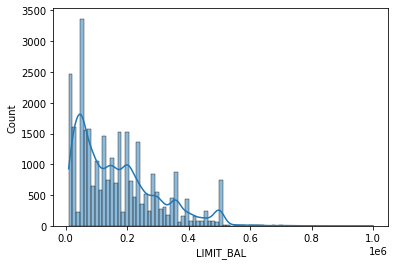

In [31]:
sns.histplot(credit_data['LIMIT_BAL'],kde=True);

In [32]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [33]:
px.histogram(credit_data['LIMIT_BAL'],)

#### 2) Age

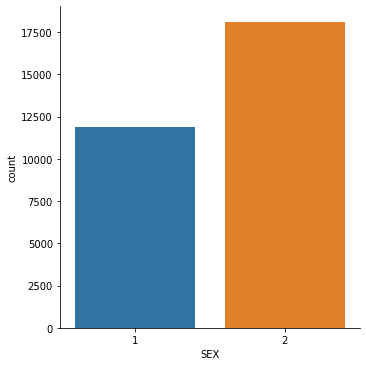

In [34]:
sns.catplot(kind='count',data=credit_data,x='SEX',legend=True);

## here male =1 and Female= 2

#### 3) Education

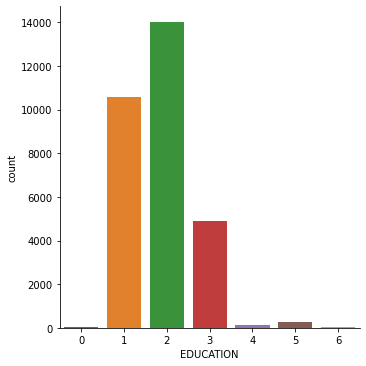

In [36]:
sns.catplot(kind='count',data=credit_data,x='EDUCATION')

#### 4) Marriage

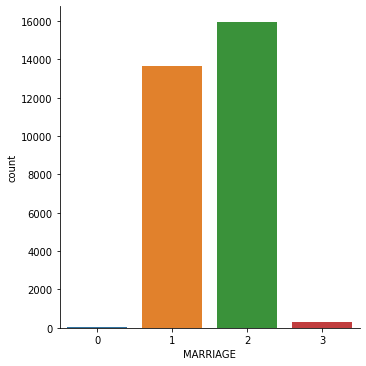

In [37]:
sns.catplot(kind='count',data=credit_data,x='MARRIAGE')

#### 5) Age

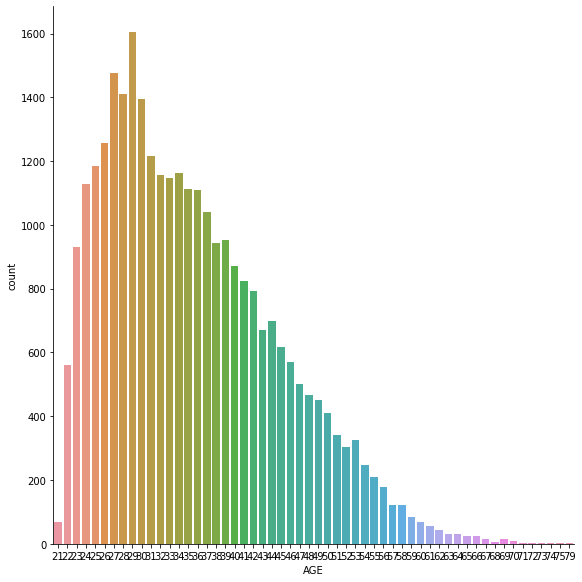

In [47]:
ax = sns.catplot(kind='count',data=credit_data,x='AGE',height=8)

#### 6) PAY_0 to PAY_6

In [70]:
## here we are using Count plot since catplot doesnt support subplots

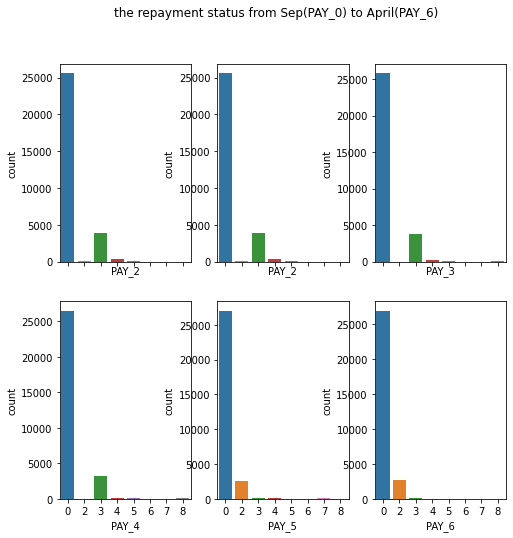

In [69]:
fig, axes = plt.subplots(2,3, sharex=True, figsize=(8,8))
fig.suptitle('the repayment status from Sep(PAY_0) to April(PAY_6)')

sns.countplot(ax=axes[0,0],data=credit_data,x='PAY_2');
sns.countplot(ax=axes[0,1],data=credit_data,x='PAY_2');
sns.countplot(ax=axes[0,2],data=credit_data,x='PAY_3');
sns.countplot(ax=axes[1,0],data=credit_data,x='PAY_4');
sns.countplot(ax=axes[1,1],data=credit_data,x='PAY_5');
sns.countplot(ax=axes[1,2],data=credit_data,x='PAY_6');

#### 7) BILL_AMT1

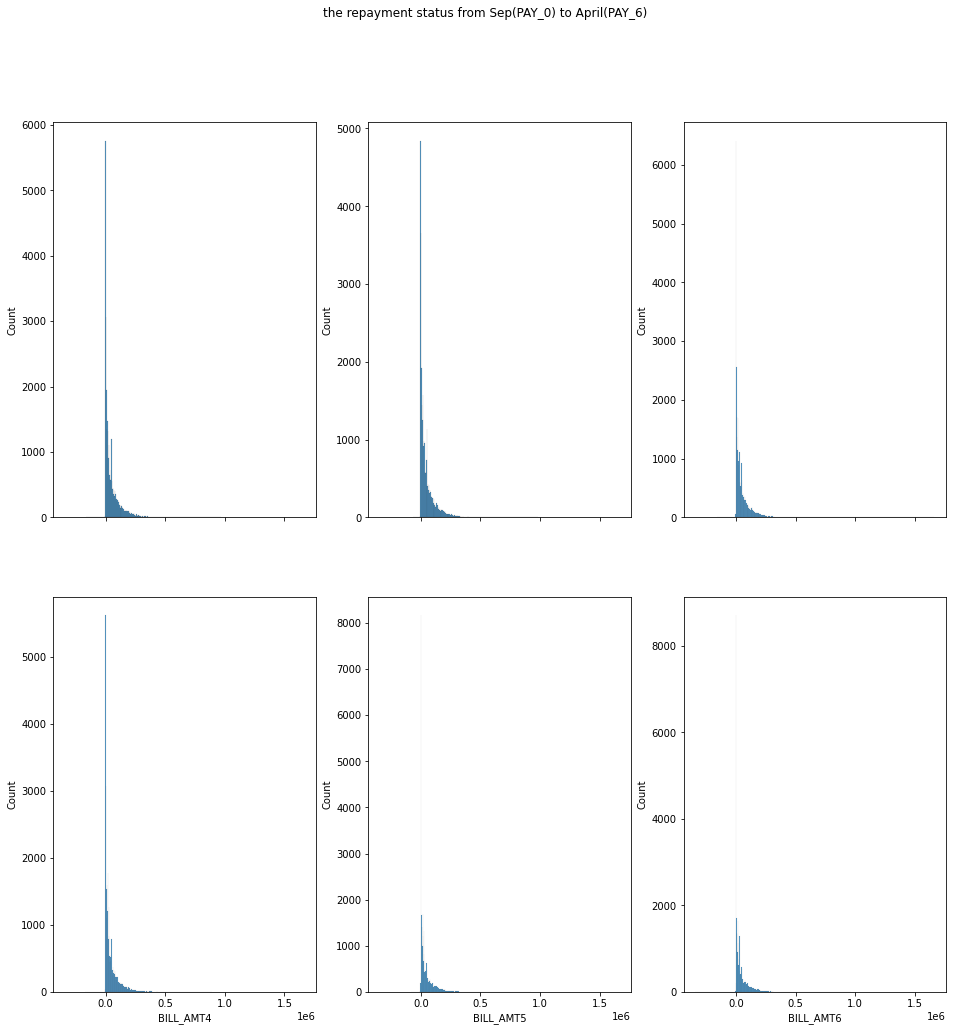

In [73]:
fig, axes = plt.subplots(2,3, sharex=True, figsize=(16,16))
fig.suptitle('the repayment status from Sep(PAY_0) to April(PAY_6)')

sns.histplot(ax=axes[0,0],data=credit_data,x='BILL_AMT1');
sns.histplot(ax=axes[0,1],data=credit_data,x='BILL_AMT2');
sns.histplot(ax=axes[0,2],data=credit_data,x='BILL_AMT3');
sns.histplot(ax=axes[1,0],data=credit_data,x='BILL_AMT4');
sns.histplot(ax=axes[1,1],data=credit_data,x='BILL_AMT5');
sns.histplot(ax=axes[1,2],data=credit_data,x='BILL_AMT6');

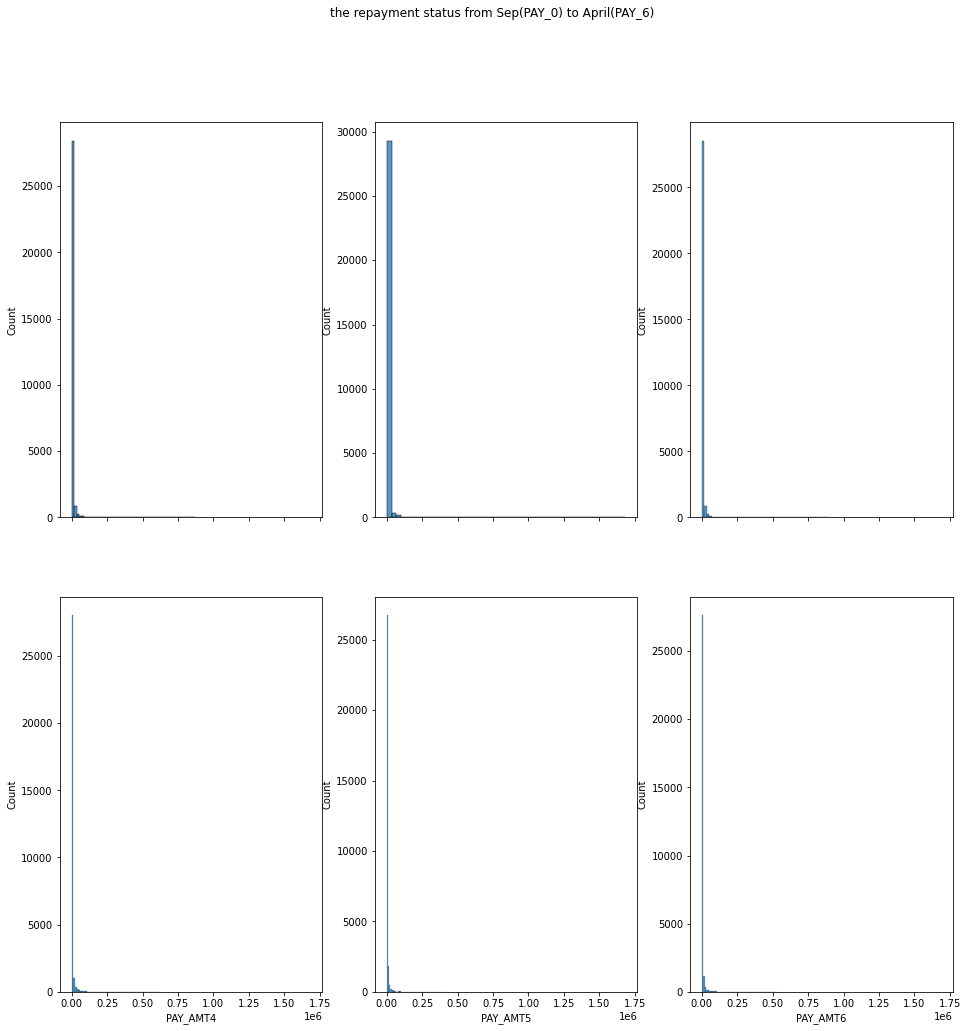

In [85]:
fig, axes = plt.subplots(2,3, sharex=True, figsize=(16,16))
fig.suptitle('the repayment status from Sep(PAY_0) to April(PAY_6)')

sns.histplot(ax=axes[0,0],data=credit_data,x='PAY_AMT1',bins=50);
sns.histplot(ax=axes[0,1],data=credit_data,x='PAY_AMT2',bins=50);
sns.histplot(ax=axes[0,2],data=credit_data,x='PAY_AMT3',bins=50);
sns.histplot(ax=axes[1,0],data=credit_data,x='PAY_AMT4',bins=50);
sns.histplot(ax=axes[1,1],data=credit_data,x='PAY_AMT5',bins=50);
sns.histplot(ax=axes[1,2],data=credit_data,x='PAY_AMT6',bins=50);

In [77]:
credit_data['PAY_AMT1'].iplot(kind='histogram',colors='red')

<AxesSubplot:xlabel='PAY_AMT6'>

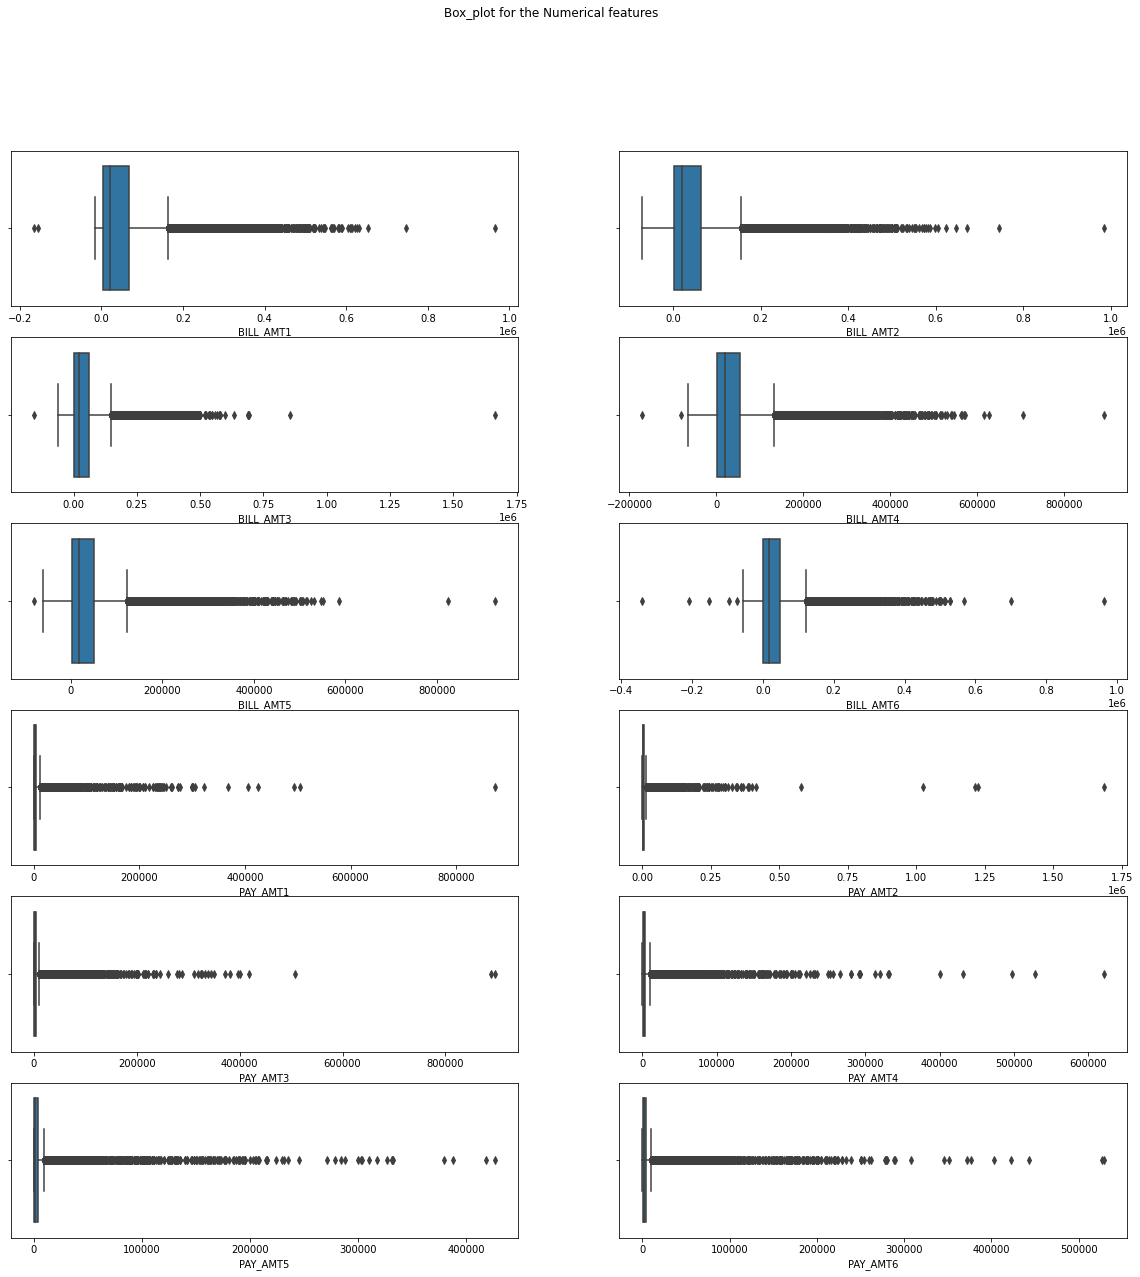

In [114]:
fig, axes = plt.subplots(6,2, sharex=False, figsize=(20,20))
fig.suptitle('Box_plot for the Numerical features')

sns.boxplot(ax=axes[0,0],data=credit_data,x='BILL_AMT1')
sns.boxplot(ax=axes[0,1],data=credit_data,x='BILL_AMT2')
sns.boxplot(ax=axes[1,0],data=credit_data,x='BILL_AMT3')
sns.boxplot(ax=axes[1,1],data=credit_data,x='BILL_AMT4')
sns.boxplot(ax=axes[2,0],data=credit_data,x='BILL_AMT5')
sns.boxplot(ax=axes[2,1],data=credit_data,x='BILL_AMT6')
sns.boxplot(ax=axes[3,0],data=credit_data,x='PAY_AMT1')
sns.boxplot(ax=axes[3,1],data=credit_data,x='PAY_AMT2')
sns.boxplot(ax=axes[4,0],data=credit_data,x='PAY_AMT3')
sns.boxplot(ax=axes[4,1],data=credit_data,x='PAY_AMT4')
sns.boxplot(ax=axes[5,0],data=credit_data,x='PAY_AMT5')
sns.boxplot(ax=axes[5,1],data=credit_data,x='PAY_AMT6')


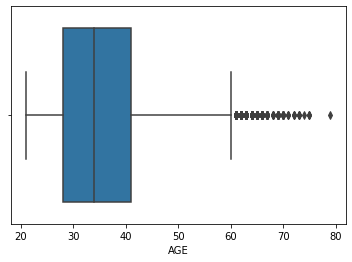

In [115]:
sns.boxplot(data=credit_data,x='AGE');

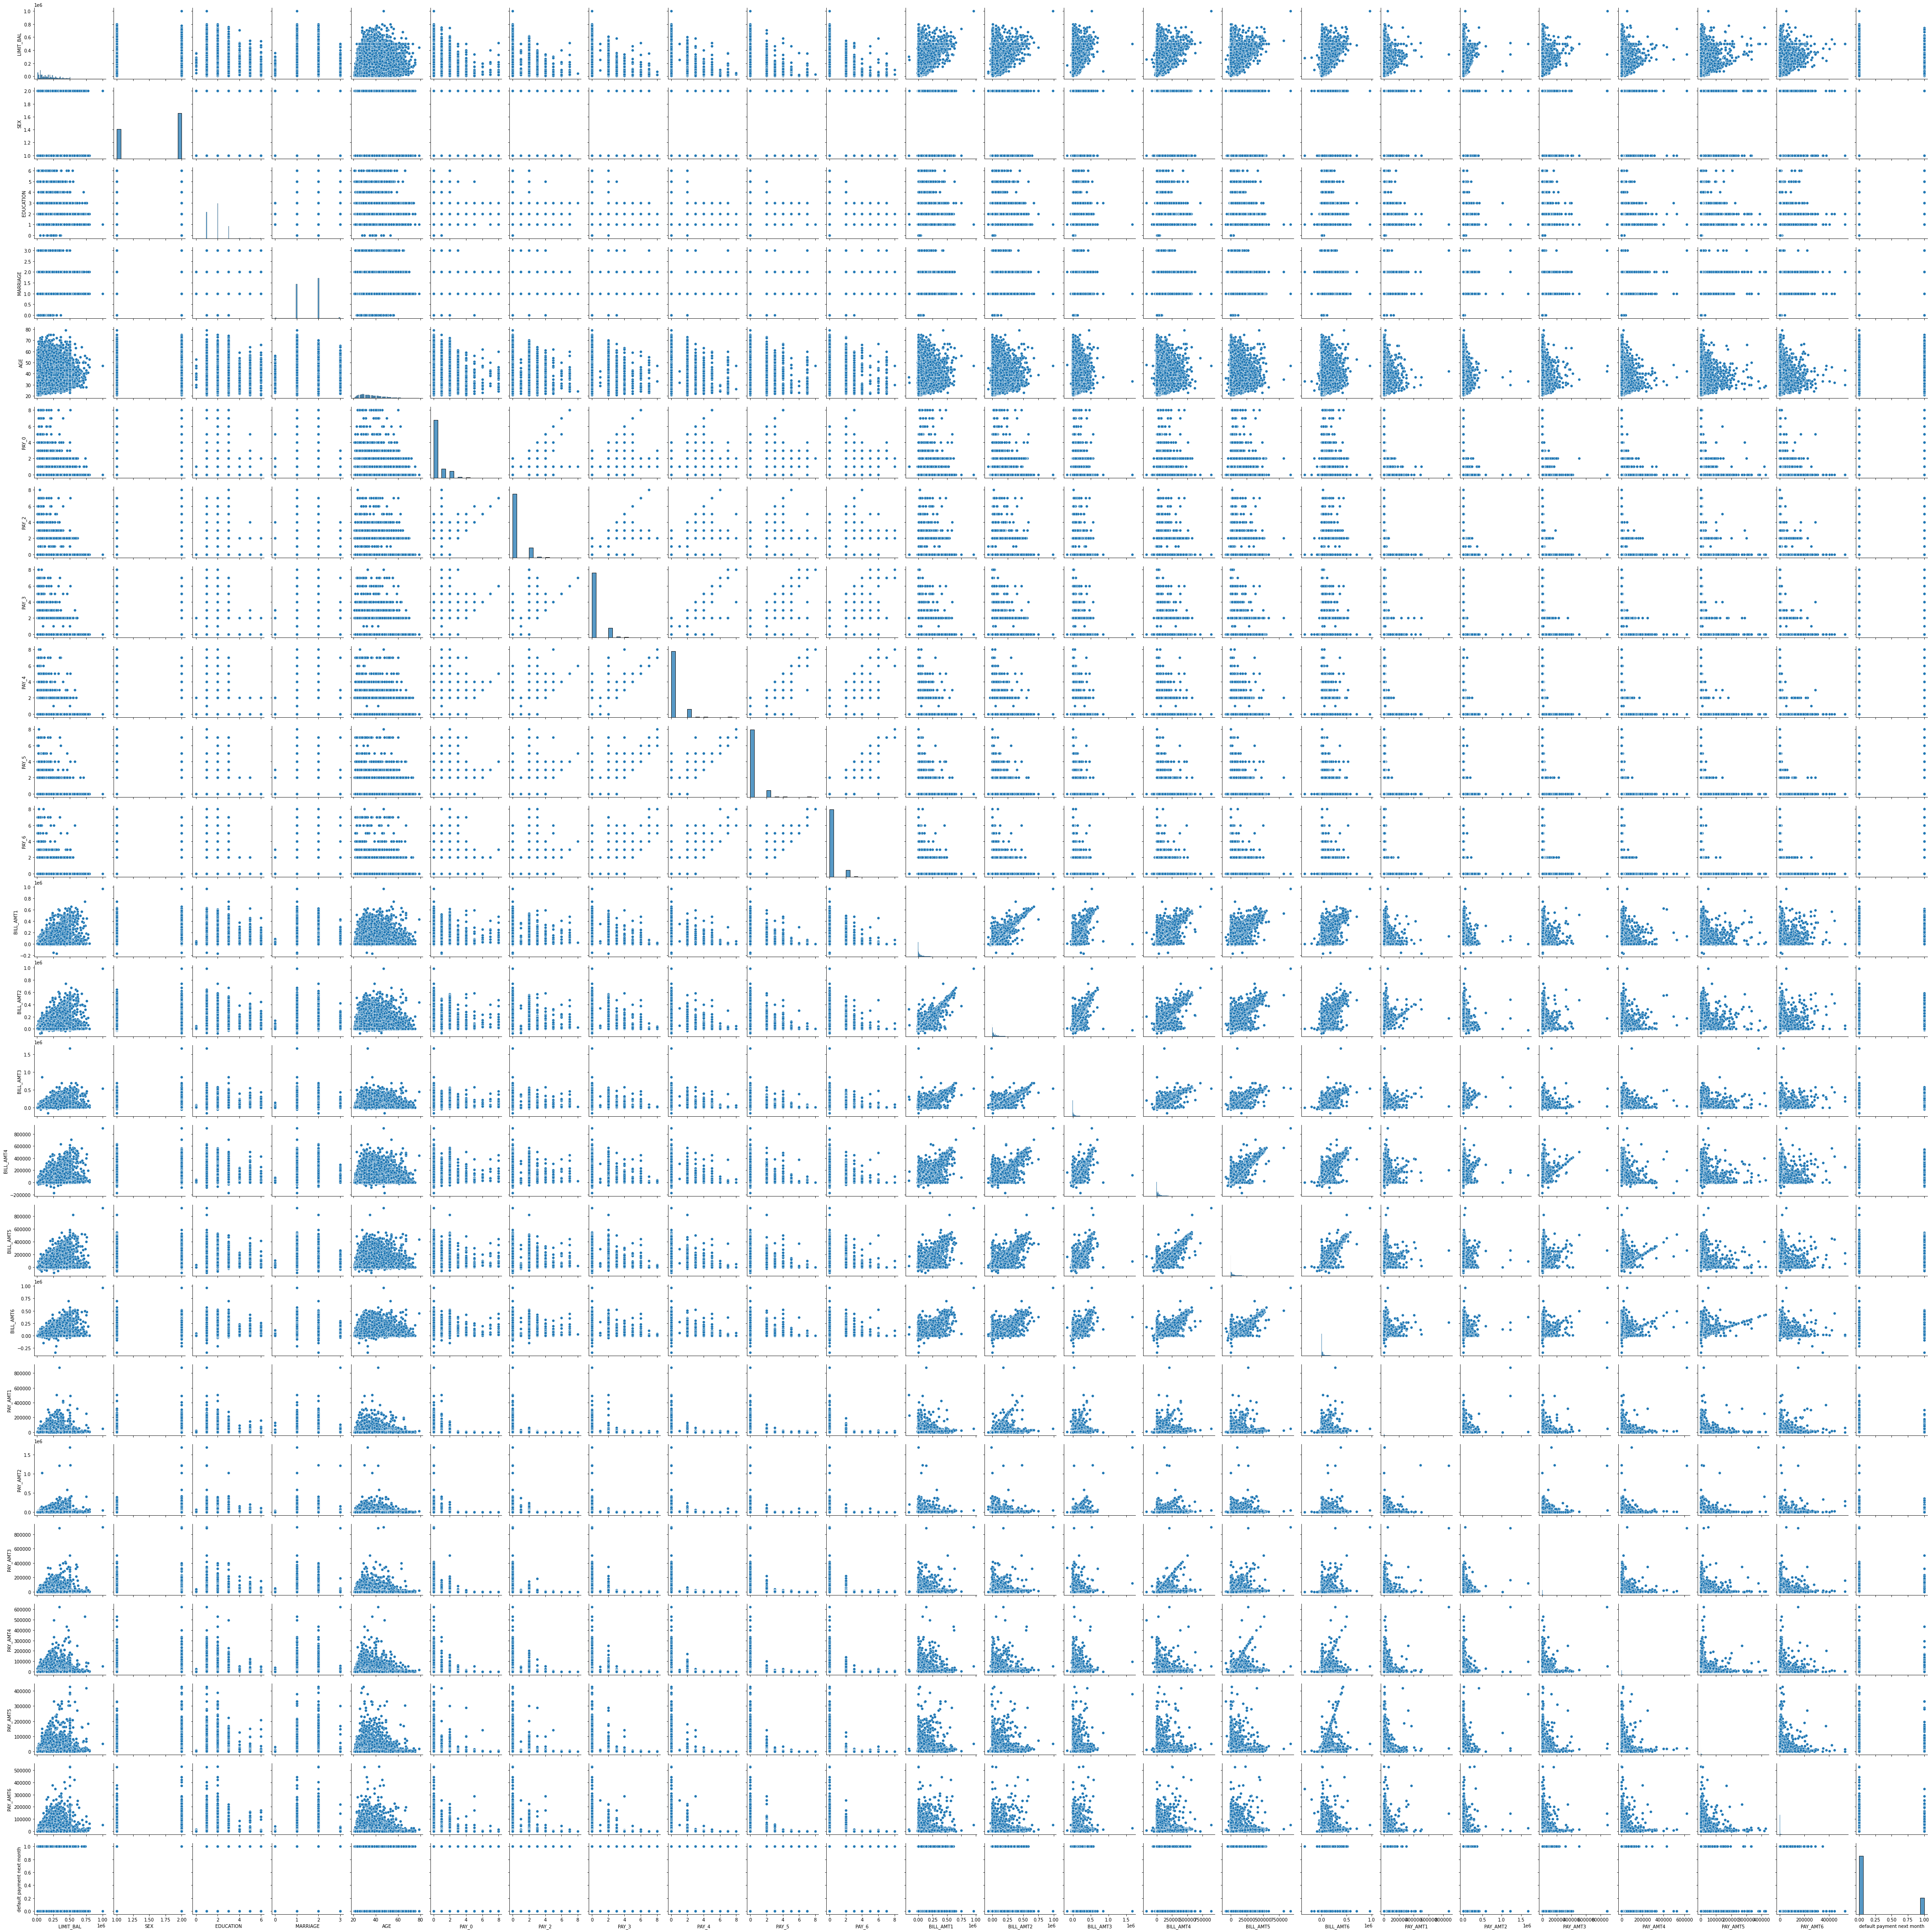

In [116]:
sns.pairplot(credit_data)